# Bill topic modelling
In this notebook, the topic of the bills will be determined based on their summary using the Gensim package.

## Preprocessing

In [3]:
import csv
import sys
import csv
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords 
from operator import itemgetter
import gensim
from gensim.test.utils import datapath
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
csv.field_size_limit(sys.maxsize)

131072

In [4]:
bills_file_path = "112.csv"
id_column = 0
dataset_topic_column = 2
summary_column = 3

In [5]:
# Read the bills CSV file
bills = []

with open(bills_file_path, newline='') as csvfile:
    rows = csv.reader(csvfile, delimiter='|')

    for row in rows:
        bill = dict()
        bill['id'] = row[id_column]
        bill['dataset_topic'] = row[dataset_topic_column]
        bill['summary'] = row[summary_column]
        bills.append(bill)

In [6]:
# Tokenize the bill sumaries
for bill in bills:
    summary = bill['summary']
    tokenized_summary = nltk.word_tokenize(summary)
    bill['tokenized_summary'] = tokenized_summary

In [7]:
# Lemmatize and filter the summaries
stop_words = set(stopwords.words('english')) 

un2wn_mapping = {"VERB" : wn.VERB, "NOUN" : wn.NOUN, "ADJ" : wn.ADJ, "ADV" : wn.ADV}
for bill in bills:
    lemmatized_summary = []
    for w, p in nltk.pos_tag(bill['tokenized_summary'], tagset="universal"):
        if p in ["PUNCT"] or w in stop_words:
            continue
        elif p in un2wn_mapping.keys():
            lemma = nltk.WordNetLemmatizer().lemmatize(w, pos = un2wn_mapping[p])
        elif p in ["PROPN"]:
            print(w)
            lemma = nltk.WordNetLemmatizer().lemmatize(w)
            
        lemmatized_summary.append(lemma.lower())  # case insensitive
        
    bill['lemmatized_summary'] = lemmatized_summary

### Topic modelling

In [8]:
summaries = [bill['lemmatized_summary'] for bill in bills]
summaries_dictionary = gensim.corpora.Dictionary(summaries)
print('Number of unique tokens:', len(summaries_dictionary))

2019-12-15 14:20:00,313 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-12-15 14:20:02,124 : INFO : adding document #10000 to Dictionary(21525 unique tokens: ['summary', 'act', 'amends', 'appropriate', 'appropriation']...)
2019-12-15 14:20:02,262 : INFO : built Dictionary(21753 unique tokens: ['summary', 'act', 'amends', 'appropriate', 'appropriation']...) from 10440 documents (total 1631944 corpus positions)


Number of unique tokens: 21753


In [9]:
summaries_dictionary.filter_extremes(no_below=50, no_above=0.5)
print('Number of unique tokens:', len(summaries_dictionary))

2019-12-15 14:20:02,358 : INFO : discarding 19714 tokens: [('act', 7405), ('amends', 6651), ('residency', 38), ('cyclohexanesulfonate', 1), ('decafluoro', 1), ('pentafluorethyl', 1), ('potassium', 14), ('arm', 45), ('ask', 3), ('cohesion', 2)]...
2019-12-15 14:20:02,360 : INFO : keeping 2039 tokens which were in no less than 50 and no more than 5220 (=50.0%) documents
2019-12-15 14:20:02,378 : INFO : resulting dictionary: Dictionary(2039 unique tokens: ['summary', 'appropriate', 'appropriation', 'approved', 'authorization']...)


Number of unique tokens: 2039


In [10]:
summaries_bow_corpus = [summaries_dictionary.doc2bow(d) for d in summaries]

In [174]:
#summaries_ldamodel = gensim.models.ldamodel.LdaModel(summaries_bow_corpus, num_topics=15, id2word = summaries_dictionary, passes = 3)

2019-12-11 20:46:28,313 : INFO : using symmetric alpha at 0.06666666666666667
2019-12-11 20:46:28,317 : INFO : using symmetric eta at 0.06666666666666667
2019-12-11 20:46:28,321 : INFO : using serial LDA version on this node
2019-12-11 20:46:28,340 : INFO : running online (multi-pass) LDA training, 15 topics, 3 passes over the supplied corpus of 10440 documents, updating model once every 2000 documents, evaluating perplexity every 10440 documents, iterating 50x with a convergence threshold of 0.001000
2019-12-11 20:46:28,348 : INFO : PROGRESS: pass 0, at document #2000/10440
2019-12-11 20:46:30,563 : INFO : merging changes from 2000 documents into a model of 10440 documents
2019-12-11 20:46:30,566 : INFO : topic #9 (0.067): 0.043*"sec" + 0.015*"program" + 0.012*"fund" + 0.010*"federal" + 0.009*"agency" + 0.009*"secretary" + 0.009*"states" + 0.008*"service" + 0.008*"requires" + 0.008*"assistance"
2019-12-11 20:46:30,568 : INFO : topic #3 (0.067): 0.017*"state" + 0.016*"code" + 0.012*"ta

2019-12-11 20:46:40,798 : INFO : topic #0 (0.067): 0.054*"states" + 0.045*"duty" + 0.045*"schedule" + 0.045*"united" + 0.039*"tariff" + 0.039*"harmonized" + 0.029*"temporarily" + 0.024*"suspend" + 0.022*"vehicle" + 0.018*"state"
2019-12-11 20:46:40,806 : INFO : topic #5 (0.067): 0.028*"area" + 0.024*"medicare" + 0.020*"july" + 0.018*"service" + 0.017*"social" + 0.014*"system" + 0.013*"program" + 0.012*"health" + 0.012*"title" + 0.012*"building"
2019-12-11 20:46:40,809 : INFO : topic diff=0.512055, rho=0.408248
2019-12-11 20:46:40,819 : INFO : PROGRESS: pass 1, at document #2000/10440
2019-12-11 20:46:42,222 : INFO : merging changes from 2000 documents into a model of 10440 documents
2019-12-11 20:46:42,224 : INFO : topic #11 (0.067): 0.031*"veteran" + 0.027*"secretary" + 0.023*"va" + 0.021*"program" + 0.016*"state" + 0.016*"affairs" + 0.015*"veterans" + 0.013*"assistance" + 0.012*"child" + 0.010*"requires"
2019-12-11 20:46:42,226 : INFO : topic #5 (0.067): 0.030*"medicare" + 0.029*"are

2019-12-11 20:46:48,622 : INFO : topic #1 (0.067): 0.034*"sec" + 0.019*"rule" + 0.014*"agreement" + 0.014*"company" + 0.013*"requirement" + 0.012*"regulation" + 0.010*"security" + 0.009*"trade" + 0.008*"agency" + 0.008*"action"
2019-12-11 20:46:48,625 : INFO : topic #12 (0.067): 0.030*"property" + 0.018*"tribe" + 0.017*"secretary" + 0.015*"state" + 0.013*"fund" + 0.012*"federal" + 0.012*"land" + 0.012*"january" + 0.011*"states" + 0.011*"amount"
2019-12-11 20:46:48,627 : INFO : topic diff=0.564699, rho=0.372161
2019-12-11 20:46:48,629 : INFO : PROGRESS: pass 2, at document #2000/10440
2019-12-11 20:46:49,912 : INFO : merging changes from 2000 documents into a model of 10440 documents
2019-12-11 20:46:49,915 : INFO : topic #3 (0.067): 0.036*"tax" + 0.028*"education" + 0.027*"school" + 0.024*"code" + 0.023*"program" + 0.022*"credit" + 0.021*"state" + 0.016*"student" + 0.016*"revenue" + 0.013*"internal"
2019-12-11 20:46:49,916 : INFO : topic #7 (0.067): 0.018*"states" + 0.017*"congress" + 

2019-12-11 20:46:56,515 : INFO : topic #4 (0.067): 0.026*"business" + 0.024*"employee" + 0.018*"loan" + 0.017*"contract" + 0.014*"small" + 0.013*"federal" + 0.012*"employer" + 0.010*"labor" + 0.010*"december" + 0.009*"requires"
2019-12-11 20:46:56,518 : INFO : topic #7 (0.067): 0.017*"states" + 0.016*"secretary" + 0.016*"congress" + 0.016*"research" + 0.014*"include" + 0.014*"activity" + 0.014*"security" + 0.014*"u.s." + 0.012*"disease" + 0.012*"national"
2019-12-11 20:46:56,520 : INFO : topic #5 (0.067): 0.052*"health" + 0.033*"care" + 0.031*"service" + 0.026*"hhs" + 0.025*"services" + 0.024*"medicare" + 0.020*"social" + 0.020*"area" + 0.019*"insurance" + 0.017*"coverage"
2019-12-11 20:46:56,524 : INFO : topic diff=0.441999, rho=0.348790


In [11]:
mallet_path = 'lib/mallet/bin/mallet'
#summaries_lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=summaries_bow_corpus, num_topics=10, id2word=summaries_dictionary)

In [16]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes = 1)
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=summaries_bow_corpus, num_topics=num_topics, id2word=summaries_dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [13]:
mallet_model_list, mallet_coherence_values = compute_coherence_values(dictionary=summaries_dictionary, corpus=summaries_bow_corpus, texts=summaries, start=2, limit=40, step=6)

2019-12-15 14:20:03,557 : INFO : serializing temporary corpus to /var/folders/47/pbrbtc5s73l1m0fdc5y_nrc40000gn/T/ef7b66_corpus.txt
2019-12-15 14:20:04,346 : INFO : converting temporary corpus to MALLET format with lib/mallet/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /var/folders/47/pbrbtc5s73l1m0fdc5y_nrc40000gn/T/ef7b66_corpus.txt --output /var/folders/47/pbrbtc5s73l1m0fdc5y_nrc40000gn/T/ef7b66_corpus.mallet
2019-12-15 14:20:08,578 : INFO : training MALLET LDA with lib/mallet/bin/mallet train-topics --input /var/folders/47/pbrbtc5s73l1m0fdc5y_nrc40000gn/T/ef7b66_corpus.mallet --num-topics 2  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /var/folders/47/pbrbtc5s73l1m0fdc5y_nrc40000gn/T/ef7b66_state.mallet.gz --output-doc-topics /var/folders/47/pbrbtc5s73l1m0fdc5y_nrc40000gn/T/ef7b66_doctopics.txt --output-topic-keys /var/folders/47/pbrbtc5s73l1m0fdc5y_nrc40000gn/T/ef7b66_topickeys.txt --num-iterations 1000 -

2019-12-15 14:21:45,935 : INFO : 86 batches submitted to accumulate stats from 5504 documents (208028 virtual)
2019-12-15 14:21:46,148 : INFO : 87 batches submitted to accumulate stats from 5568 documents (212948 virtual)
2019-12-15 14:21:46,247 : INFO : 88 batches submitted to accumulate stats from 5632 documents (216008 virtual)
2019-12-15 14:21:46,508 : INFO : 90 batches submitted to accumulate stats from 5760 documents (217983 virtual)
2019-12-15 14:21:46,843 : INFO : 92 batches submitted to accumulate stats from 5888 documents (219762 virtual)
2019-12-15 14:21:46,944 : INFO : 94 batches submitted to accumulate stats from 6016 documents (220022 virtual)
2019-12-15 14:21:47,018 : INFO : 95 batches submitted to accumulate stats from 6080 documents (222406 virtual)
2019-12-15 14:21:47,089 : INFO : 96 batches submitted to accumulate stats from 6144 documents (222442 virtual)
2019-12-15 14:21:47,171 : INFO : 97 batches submitted to accumulate stats from 6208 documents (253158 virtual)
2

2019-12-15 14:21:59,282 : INFO : training MALLET LDA with lib/mallet/bin/mallet train-topics --input /var/folders/47/pbrbtc5s73l1m0fdc5y_nrc40000gn/T/6cfd1f_corpus.mallet --num-topics 8  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /var/folders/47/pbrbtc5s73l1m0fdc5y_nrc40000gn/T/6cfd1f_state.mallet.gz --output-doc-topics /var/folders/47/pbrbtc5s73l1m0fdc5y_nrc40000gn/T/6cfd1f_doctopics.txt --output-topic-keys /var/folders/47/pbrbtc5s73l1m0fdc5y_nrc40000gn/T/6cfd1f_topickeys.txt --num-iterations 1000 --inferencer-filename /var/folders/47/pbrbtc5s73l1m0fdc5y_nrc40000gn/T/6cfd1f_inferencer.mallet --doc-topics-threshold 0.0  --random-seed 0
2019-12-15 14:23:32,774 : INFO : loading assigned topics from /var/folders/47/pbrbtc5s73l1m0fdc5y_nrc40000gn/T/6cfd1f_state.mallet.gz
2019-12-15 14:23:38,908 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-12-15 14:23:38,949 : INFO : 1 batches submitted 

2019-12-15 14:23:54,124 : INFO : 93 batches submitted to accumulate stats from 5952 documents (212261 virtual)
2019-12-15 14:23:54,223 : INFO : 95 batches submitted to accumulate stats from 6080 documents (212514 virtual)
2019-12-15 14:23:54,522 : INFO : 96 batches submitted to accumulate stats from 6144 documents (215832 virtual)
2019-12-15 14:23:54,613 : INFO : 98 batches submitted to accumulate stats from 6272 documents (219620 virtual)
2019-12-15 14:23:54,874 : INFO : 99 batches submitted to accumulate stats from 6336 documents (246853 virtual)
2019-12-15 14:23:55,614 : INFO : 104 batches submitted to accumulate stats from 6656 documents (244043 virtual)
2019-12-15 14:23:55,725 : INFO : 105 batches submitted to accumulate stats from 6720 documents (244357 virtual)
2019-12-15 14:23:55,897 : INFO : 106 batches submitted to accumulate stats from 6784 documents (246610 virtual)
2019-12-15 14:23:55,915 : INFO : 107 batches submitted to accumulate stats from 6848 documents (250151 virtua

2019-12-15 14:25:50,327 : INFO : loading assigned topics from /var/folders/47/pbrbtc5s73l1m0fdc5y_nrc40000gn/T/a168e_state.mallet.gz
2019-12-15 14:25:56,397 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-12-15 14:25:56,439 : INFO : 1 batches submitted to accumulate stats from 64 documents (2183 virtual)
2019-12-15 14:25:56,482 : INFO : 4 batches submitted to accumulate stats from 256 documents (3158 virtual)
2019-12-15 14:25:56,511 : INFO : 5 batches submitted to accumulate stats from 320 documents (7022 virtual)
2019-12-15 14:25:56,536 : INFO : 6 batches submitted to accumulate stats from 384 documents (12995 virtual)
2019-12-15 14:25:56,860 : INFO : 7 batches submitted to accumulate stats from 448 documents (13424 virtual)
2019-12-15 14:25:57,058 : INFO : 8 batches submitted to accumulate stats from 512 documents (13757 virtual)
2019-12-15 14:25:57,753 : INFO : 10 batches submitted to accumulate stats f

2019-12-15 14:26:20,723 : INFO : 106 batches submitted to accumulate stats from 6784 documents (246096 virtual)
2019-12-15 14:26:20,774 : INFO : 107 batches submitted to accumulate stats from 6848 documents (247301 virtual)
2019-12-15 14:26:21,032 : INFO : 108 batches submitted to accumulate stats from 6912 documents (250400 virtual)
2019-12-15 14:26:21,409 : INFO : 109 batches submitted to accumulate stats from 6976 documents (252387 virtual)
2019-12-15 14:26:21,610 : INFO : 110 batches submitted to accumulate stats from 7040 documents (263094 virtual)
2019-12-15 14:26:22,131 : INFO : 111 batches submitted to accumulate stats from 7104 documents (269969 virtual)
2019-12-15 14:26:22,244 : INFO : 112 batches submitted to accumulate stats from 7168 documents (273805 virtual)
2019-12-15 14:26:22,839 : INFO : 113 batches submitted to accumulate stats from 7232 documents (275154 virtual)
2019-12-15 14:26:22,977 : INFO : 114 batches submitted to accumulate stats from 7296 documents (280671 v

2019-12-15 14:28:32,017 : INFO : 7 batches submitted to accumulate stats from 448 documents (12988 virtual)
2019-12-15 14:28:32,224 : INFO : 8 batches submitted to accumulate stats from 512 documents (13550 virtual)
2019-12-15 14:28:32,898 : INFO : 10 batches submitted to accumulate stats from 640 documents (14376 virtual)
2019-12-15 14:28:33,593 : INFO : 11 batches submitted to accumulate stats from 704 documents (20626 virtual)
2019-12-15 14:28:34,079 : INFO : 13 batches submitted to accumulate stats from 832 documents (21302 virtual)
2019-12-15 14:28:34,141 : INFO : 14 batches submitted to accumulate stats from 896 documents (29617 virtual)
2019-12-15 14:28:34,679 : INFO : 16 batches submitted to accumulate stats from 1024 documents (32350 virtual)
2019-12-15 14:28:35,422 : INFO : 18 batches submitted to accumulate stats from 1152 documents (32476 virtual)
2019-12-15 14:28:35,777 : INFO : 20 batches submitted to accumulate stats from 1280 documents (32615 virtual)
2019-12-15 14:28:3

2019-12-15 14:29:05,225 : INFO : 116 batches submitted to accumulate stats from 7424 documents (282675 virtual)
2019-12-15 14:29:06,139 : INFO : 117 batches submitted to accumulate stats from 7488 documents (288327 virtual)
2019-12-15 14:29:06,570 : INFO : 118 batches submitted to accumulate stats from 7552 documents (307134 virtual)
2019-12-15 14:29:06,647 : INFO : 119 batches submitted to accumulate stats from 7616 documents (308212 virtual)
2019-12-15 14:29:07,780 : INFO : 121 batches submitted to accumulate stats from 7744 documents (313188 virtual)
2019-12-15 14:29:08,097 : INFO : 122 batches submitted to accumulate stats from 7808 documents (315353 virtual)
2019-12-15 14:29:08,361 : INFO : 123 batches submitted to accumulate stats from 7872 documents (315933 virtual)
2019-12-15 14:29:08,867 : INFO : 124 batches submitted to accumulate stats from 7936 documents (329578 virtual)
2019-12-15 14:29:08,892 : INFO : 125 batches submitted to accumulate stats from 8000 documents (329777 v

2019-12-15 14:31:58,428 : INFO : 26 batches submitted to accumulate stats from 1664 documents (51084 virtual)
2019-12-15 14:32:00,433 : INFO : 28 batches submitted to accumulate stats from 1792 documents (51310 virtual)
2019-12-15 14:32:01,450 : INFO : 30 batches submitted to accumulate stats from 1920 documents (51135 virtual)
2019-12-15 14:32:02,630 : INFO : 31 batches submitted to accumulate stats from 1984 documents (52011 virtual)
2019-12-15 14:32:02,796 : INFO : 32 batches submitted to accumulate stats from 2048 documents (56009 virtual)
2019-12-15 14:32:03,699 : INFO : 34 batches submitted to accumulate stats from 2176 documents (59612 virtual)
2019-12-15 14:32:04,782 : INFO : 36 batches submitted to accumulate stats from 2304 documents (62211 virtual)
2019-12-15 14:32:04,857 : INFO : 37 batches submitted to accumulate stats from 2368 documents (63966 virtual)
2019-12-15 14:32:05,640 : INFO : 38 batches submitted to accumulate stats from 2432 documents (71298 virtual)
2019-12-15

2019-12-15 14:32:56,646 : INFO : 126 batches submitted to accumulate stats from 8064 documents (338894 virtual)
2019-12-15 14:32:56,700 : INFO : 127 batches submitted to accumulate stats from 8128 documents (339442 virtual)
2019-12-15 14:32:56,913 : INFO : 128 batches submitted to accumulate stats from 8192 documents (340382 virtual)
2019-12-15 14:32:57,881 : INFO : 129 batches submitted to accumulate stats from 8256 documents (340502 virtual)
2019-12-15 14:32:58,076 : INFO : 130 batches submitted to accumulate stats from 8320 documents (342322 virtual)
2019-12-15 14:32:59,090 : INFO : 131 batches submitted to accumulate stats from 8384 documents (342594 virtual)
2019-12-15 14:32:59,685 : INFO : 132 batches submitted to accumulate stats from 8448 documents (359120 virtual)
2019-12-15 14:32:59,900 : INFO : 133 batches submitted to accumulate stats from 8512 documents (363394 virtual)
2019-12-15 14:33:00,240 : INFO : 134 batches submitted to accumulate stats from 8576 documents (368546 v

2019-12-15 14:35:58,834 : INFO : 34 batches submitted to accumulate stats from 2176 documents (58179 virtual)
2019-12-15 14:36:00,396 : INFO : 36 batches submitted to accumulate stats from 2304 documents (61218 virtual)
2019-12-15 14:36:00,468 : INFO : 37 batches submitted to accumulate stats from 2368 documents (62167 virtual)
2019-12-15 14:36:01,519 : INFO : 38 batches submitted to accumulate stats from 2432 documents (70061 virtual)
2019-12-15 14:36:02,057 : INFO : 39 batches submitted to accumulate stats from 2496 documents (71251 virtual)
2019-12-15 14:36:02,307 : INFO : 40 batches submitted to accumulate stats from 2560 documents (75296 virtual)
2019-12-15 14:36:02,674 : INFO : 41 batches submitted to accumulate stats from 2624 documents (79423 virtual)
2019-12-15 14:36:04,379 : INFO : 43 batches submitted to accumulate stats from 2752 documents (82338 virtual)
2019-12-15 14:36:05,475 : INFO : 44 batches submitted to accumulate stats from 2816 documents (83078 virtual)
2019-12-15

2019-12-15 14:36:54,072 : INFO : 136 batches submitted to accumulate stats from 8704 documents (366291 virtual)
2019-12-15 14:36:54,112 : INFO : 137 batches submitted to accumulate stats from 8768 documents (372971 virtual)
2019-12-15 14:36:54,918 : INFO : 138 batches submitted to accumulate stats from 8832 documents (373368 virtual)
2019-12-15 14:36:55,682 : INFO : 139 batches submitted to accumulate stats from 8896 documents (375452 virtual)
2019-12-15 14:36:56,746 : INFO : 140 batches submitted to accumulate stats from 8960 documents (379399 virtual)
2019-12-15 14:36:58,384 : INFO : 142 batches submitted to accumulate stats from 9088 documents (384528 virtual)
2019-12-15 14:36:58,449 : INFO : 143 batches submitted to accumulate stats from 9152 documents (391033 virtual)
2019-12-15 14:36:58,937 : INFO : 144 batches submitted to accumulate stats from 9216 documents (403390 virtual)
2019-12-15 14:36:59,481 : INFO : 145 batches submitted to accumulate stats from 9280 documents (415958 v

2019-12-15 14:39:50,057 : INFO : 50 batches submitted to accumulate stats from 3200 documents (86279 virtual)
2019-12-15 14:39:50,167 : INFO : 51 batches submitted to accumulate stats from 3264 documents (89280 virtual)
2019-12-15 14:39:51,505 : INFO : 54 batches submitted to accumulate stats from 3456 documents (89360 virtual)
2019-12-15 14:39:52,336 : INFO : 55 batches submitted to accumulate stats from 3520 documents (90685 virtual)
2019-12-15 14:39:53,321 : INFO : 58 batches submitted to accumulate stats from 3712 documents (88370 virtual)
2019-12-15 14:39:53,577 : INFO : 59 batches submitted to accumulate stats from 3776 documents (89834 virtual)
2019-12-15 14:39:54,377 : INFO : 61 batches submitted to accumulate stats from 3904 documents (118593 virtual)
2019-12-15 14:39:54,724 : INFO : 62 batches submitted to accumulate stats from 3968 documents (119966 virtual)
2019-12-15 14:39:55,025 : INFO : 63 batches submitted to accumulate stats from 4032 documents (138183 virtual)
2019-12

2019-12-15 14:40:51,997 : INFO : 149 batches submitted to accumulate stats from 9536 documents (426473 virtual)
2019-12-15 14:40:54,879 : INFO : 151 batches submitted to accumulate stats from 9664 documents (437046 virtual)
2019-12-15 14:40:55,302 : INFO : 152 batches submitted to accumulate stats from 9728 documents (438242 virtual)
2019-12-15 14:40:55,471 : INFO : 153 batches submitted to accumulate stats from 9792 documents (444997 virtual)
2019-12-15 14:40:56,384 : INFO : 155 batches submitted to accumulate stats from 9920 documents (470907 virtual)
2019-12-15 14:40:56,856 : INFO : 156 batches submitted to accumulate stats from 9984 documents (474882 virtual)
2019-12-15 14:40:58,354 : INFO : 158 batches submitted to accumulate stats from 10112 documents (476409 virtual)
2019-12-15 14:40:59,650 : INFO : 159 batches submitted to accumulate stats from 10176 documents (478936 virtual)
2019-12-15 14:40:59,835 : INFO : 160 batches submitted to accumulate stats from 10240 documents (48083

In [17]:
model_list, coherence_values = compute_coherence_values(dictionary=summaries_dictionary, corpus=summaries_bow_corpus, texts=summaries, start=2, limit=40, step=6)

2019-12-15 14:52:30,658 : INFO : using symmetric alpha at 0.5
2019-12-15 14:52:30,660 : INFO : using symmetric eta at 0.5
2019-12-15 14:52:30,664 : INFO : using serial LDA version on this node
2019-12-15 14:52:30,675 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 10440 documents, updating model once every 2000 documents, evaluating perplexity every 10440 documents, iterating 50x with a convergence threshold of 0.001000
2019-12-15 14:52:30,676 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-12-15 14:52:30,680 : INFO : PROGRESS: pass 0, at document #2000/10440
2019-12-15 14:52:32,832 : INFO : merging changes from 2000 documents into a model of 10440 documents
2019-12-15 14:52:32,836 : INFO : topic #0 (0.500): 0.017*"sec" + 0.014*"secretary" + 0.011*"requires" + 0.011*"program" + 0.010*"state" + 0.009*"service" + 0.008*"federal" + 0.007*"fund" + 0.0

2019-12-15 14:52:43,586 : INFO : 40 batches submitted to accumulate stats from 2560 documents (85946 virtual)
2019-12-15 14:52:43,723 : INFO : 42 batches submitted to accumulate stats from 2688 documents (89249 virtual)
2019-12-15 14:52:43,871 : INFO : 43 batches submitted to accumulate stats from 2752 documents (90140 virtual)
2019-12-15 14:52:44,054 : INFO : 45 batches submitted to accumulate stats from 2880 documents (90348 virtual)
2019-12-15 14:52:44,169 : INFO : 46 batches submitted to accumulate stats from 2944 documents (90491 virtual)
2019-12-15 14:52:44,178 : INFO : 47 batches submitted to accumulate stats from 3008 documents (92641 virtual)
2019-12-15 14:52:44,271 : INFO : 48 batches submitted to accumulate stats from 3072 documents (93356 virtual)
2019-12-15 14:52:44,349 : INFO : 49 batches submitted to accumulate stats from 3136 documents (97641 virtual)
2019-12-15 14:52:44,501 : INFO : 52 batches submitted to accumulate stats from 3328 documents (97160 virtual)
2019-12-15

2019-12-15 14:52:52,754 : INFO : 133 batches submitted to accumulate stats from 8512 documents (395683 virtual)
2019-12-15 14:52:52,789 : INFO : 134 batches submitted to accumulate stats from 8576 documents (396885 virtual)
2019-12-15 14:52:53,130 : INFO : 135 batches submitted to accumulate stats from 8640 documents (397181 virtual)
2019-12-15 14:52:53,251 : INFO : 136 batches submitted to accumulate stats from 8704 documents (401641 virtual)
2019-12-15 14:52:53,393 : INFO : 137 batches submitted to accumulate stats from 8768 documents (404654 virtual)
2019-12-15 14:52:53,594 : INFO : 138 batches submitted to accumulate stats from 8832 documents (408828 virtual)
2019-12-15 14:52:53,673 : INFO : 139 batches submitted to accumulate stats from 8896 documents (414124 virtual)
2019-12-15 14:52:53,713 : INFO : 140 batches submitted to accumulate stats from 8960 documents (438914 virtual)
2019-12-15 14:52:53,805 : INFO : 141 batches submitted to accumulate stats from 9024 documents (443711 v

2019-12-15 14:53:05,564 : INFO : PROGRESS: pass 0, at document #8000/10440
2019-12-15 14:53:09,122 : INFO : merging changes from 2000 documents into a model of 10440 documents
2019-12-15 14:53:09,125 : INFO : topic #7 (0.125): 0.023*"health" + 0.018*"service" + 0.013*"care" + 0.010*"program" + 0.009*"insurance" + 0.009*"medicare" + 0.009*"plan" + 0.009*"tax" + 0.009*"state" + 0.009*"payment"
2019-12-15 14:53:09,133 : INFO : topic #4 (0.125): 0.018*"secretary" + 0.016*"state" + 0.015*"land" + 0.012*"area" + 0.010*"sec" + 0.010*"national" + 0.009*"water" + 0.009*"federal" + 0.009*"requires" + 0.008*"tribe"
2019-12-15 14:53:09,136 : INFO : topic #3 (0.125): 0.014*"states" + 0.010*"person" + 0.010*"violence" + 0.009*"state" + 0.009*"united" + 0.008*"alien" + 0.008*"law" + 0.008*"u.s." + 0.007*"federal" + 0.007*"include"
2019-12-15 14:53:09,144 : INFO : topic #6 (0.125): 0.048*"program" + 0.017*"state" + 0.013*"grant" + 0.013*"year" + 0.012*"education" + 0.012*"secretary" + 0.011*"school" +

2019-12-15 14:53:21,064 : INFO : 53 batches submitted to accumulate stats from 3392 documents (90153 virtual)
2019-12-15 14:53:21,622 : INFO : 54 batches submitted to accumulate stats from 3456 documents (91212 virtual)
2019-12-15 14:53:21,741 : INFO : 55 batches submitted to accumulate stats from 3520 documents (92423 virtual)
2019-12-15 14:53:23,049 : INFO : 56 batches submitted to accumulate stats from 3584 documents (92494 virtual)
2019-12-15 14:53:24,139 : INFO : 59 batches submitted to accumulate stats from 3776 documents (91795 virtual)
2019-12-15 14:53:24,807 : INFO : 60 batches submitted to accumulate stats from 3840 documents (118292 virtual)
2019-12-15 14:53:25,193 : INFO : 61 batches submitted to accumulate stats from 3904 documents (122686 virtual)
2019-12-15 14:53:25,887 : INFO : 63 batches submitted to accumulate stats from 4032 documents (142049 virtual)
2019-12-15 14:53:26,806 : INFO : 65 batches submitted to accumulate stats from 4160 documents (142440 virtual)
2019-1

2019-12-15 14:53:43,786 : INFO : 146 batches submitted to accumulate stats from 9344 documents (433886 virtual)
2019-12-15 14:53:44,372 : INFO : 148 batches submitted to accumulate stats from 9472 documents (434685 virtual)
2019-12-15 14:53:44,861 : INFO : 149 batches submitted to accumulate stats from 9536 documents (445237 virtual)
2019-12-15 14:53:44,944 : INFO : 150 batches submitted to accumulate stats from 9600 documents (446615 virtual)
2019-12-15 14:53:45,176 : INFO : 151 batches submitted to accumulate stats from 9664 documents (448521 virtual)
2019-12-15 14:53:45,234 : INFO : 152 batches submitted to accumulate stats from 9728 documents (452618 virtual)
2019-12-15 14:53:45,529 : INFO : 153 batches submitted to accumulate stats from 9792 documents (476594 virtual)
2019-12-15 14:53:45,874 : INFO : 154 batches submitted to accumulate stats from 9856 documents (480760 virtual)
2019-12-15 14:53:46,036 : INFO : 155 batches submitted to accumulate stats from 9920 documents (483474 v

2019-12-15 14:53:55,920 : INFO : topic #0 (0.071): 0.023*"program" + 0.016*"state" + 0.016*"project" + 0.014*"rule" + 0.012*"agency" + 0.011*"transportation" + 0.010*"secretary" + 0.010*"safety" + 0.010*"vehicle" + 0.010*"grant"
2019-12-15 14:53:55,921 : INFO : topic diff=0.470670, rho=0.500000
2019-12-15 14:53:55,925 : INFO : PROGRESS: pass 0, at document #10000/10440
2019-12-15 14:53:57,294 : INFO : merging changes from 2000 documents into a model of 10440 documents
2019-12-15 14:53:57,298 : INFO : topic #13 (0.071): 0.018*"sec" + 0.017*"secretary" + 0.016*"land" + 0.015*"area" + 0.014*"energy" + 0.013*"water" + 0.012*"project" + 0.012*"fund" + 0.011*"program" + 0.011*"requires"
2019-12-15 14:53:57,299 : INFO : topic #10 (0.071): 0.035*"school" + 0.035*"program" + 0.032*"state" + 0.023*"education" + 0.022*"student" + 0.015*"grant" + 0.014*"child" + 0.013*"leas" + 0.012*"title" + 0.012*"secretary"
2019-12-15 14:53:57,302 : INFO : topic #5 (0.071): 0.021*"information" + 0.017*"security

2019-12-15 14:54:10,554 : INFO : 68 batches submitted to accumulate stats from 4352 documents (145541 virtual)
2019-12-15 14:54:10,943 : INFO : 69 batches submitted to accumulate stats from 4416 documents (145781 virtual)
2019-12-15 14:54:11,848 : INFO : 71 batches submitted to accumulate stats from 4544 documents (146240 virtual)
2019-12-15 14:54:12,183 : INFO : 73 batches submitted to accumulate stats from 4672 documents (148337 virtual)
2019-12-15 14:54:12,237 : INFO : 74 batches submitted to accumulate stats from 4736 documents (152092 virtual)
2019-12-15 14:54:12,278 : INFO : 75 batches submitted to accumulate stats from 4800 documents (156241 virtual)
2019-12-15 14:54:12,475 : INFO : 76 batches submitted to accumulate stats from 4864 documents (161002 virtual)
2019-12-15 14:54:12,599 : INFO : 77 batches submitted to accumulate stats from 4928 documents (161048 virtual)
2019-12-15 14:54:13,239 : INFO : 80 batches submitted to accumulate stats from 5120 documents (162804 virtual)
2

2019-12-15 14:54:32,360 : INFO : 160 batches submitted to accumulate stats from 10240 documents (494015 virtual)
2019-12-15 14:54:32,421 : INFO : 161 batches submitted to accumulate stats from 10304 documents (497991 virtual)
2019-12-15 14:54:32,818 : INFO : 162 batches submitted to accumulate stats from 10368 documents (503040 virtual)
2019-12-15 14:54:33,850 : INFO : serializing accumulator to return to master...
2019-12-15 14:54:33,859 : INFO : accumulator serialized
2019-12-15 14:54:34,070 : INFO : serializing accumulator to return to master...
2019-12-15 14:54:34,076 : INFO : accumulator serialized
2019-12-15 14:54:34,262 : INFO : serializing accumulator to return to master...
2019-12-15 14:54:34,270 : INFO : accumulator serialized
2019-12-15 14:54:34,370 : INFO : 3 accumulators retrieved from output queue
2019-12-15 14:54:34,429 : INFO : accumulated word occurrence stats for 940837 virtual documents
2019-12-15 14:54:35,202 : INFO : using symmetric alpha at 0.05
2019-12-15 14:54:3

2019-12-15 14:54:43,887 : INFO : topic diff=0.639765, rho=0.447214
2019-12-15 14:54:44,397 : INFO : -6.479 per-word bound, 89.2 perplexity estimate based on a held-out corpus of 440 documents with 55666 words
2019-12-15 14:54:44,398 : INFO : PROGRESS: pass 0, at document #10440/10440
2019-12-15 14:54:44,730 : INFO : merging changes from 440 documents into a model of 10440 documents
2019-12-15 14:54:44,733 : INFO : topic #8 (0.050): 0.036*"business" + 0.023*"veteran" + 0.022*"september" + 0.021*"small" + 0.019*"drug" + 0.019*"va" + 0.018*"january" + 0.015*"october" + 0.014*"contract" + 0.014*"secretary"
2019-12-15 14:54:44,735 : INFO : topic #12 (0.050): 0.032*"secretary" + 0.029*"sec" + 0.013*"requires" + 0.012*"report" + 0.010*"include" + 0.010*"directs" + 0.009*"congress" + 0.009*"security" + 0.007*"u.s." + 0.007*"use"
2019-12-15 14:54:44,739 : INFO : topic #1 (0.050): 0.041*"sec" + 0.024*"states" + 0.021*"congress" + 0.020*"u.s." + 0.019*"president" + 0.016*"agreement" + 0.015*"dece

2019-12-15 14:55:17,700 : INFO : 92 batches submitted to accumulate stats from 5888 documents (206100 virtual)
2019-12-15 14:55:17,743 : INFO : 93 batches submitted to accumulate stats from 5952 documents (206123 virtual)
2019-12-15 14:55:18,984 : INFO : 94 batches submitted to accumulate stats from 6016 documents (208880 virtual)
2019-12-15 14:55:19,752 : INFO : 96 batches submitted to accumulate stats from 6144 documents (208490 virtual)
2019-12-15 14:55:20,089 : INFO : 97 batches submitted to accumulate stats from 6208 documents (210853 virtual)
2019-12-15 14:55:20,596 : INFO : 99 batches submitted to accumulate stats from 6336 documents (240673 virtual)
2019-12-15 14:55:20,889 : INFO : 100 batches submitted to accumulate stats from 6400 documents (241721 virtual)
2019-12-15 14:55:20,897 : INFO : 101 batches submitted to accumulate stats from 6464 documents (242412 virtual)
2019-12-15 14:55:22,564 : INFO : 105 batches submitted to accumulate stats from 6720 documents (238628 virtual

2019-12-15 14:55:54,152 : INFO : topic #10 (0.038): 0.017*"sec" + 0.016*"secretary" + 0.012*"program" + 0.012*"service" + 0.010*"provide" + 0.010*"use" + 0.009*"veteran" + 0.009*"fund" + 0.009*"requires" + 0.008*"health"
2019-12-15 14:55:54,154 : INFO : topic #2 (0.038): 0.019*"program" + 0.013*"health" + 0.012*"employee" + 0.012*"agency" + 0.011*"federal" + 0.011*"requires" + 0.009*"activity" + 0.008*"plan" + 0.008*"service" + 0.008*"secretary"
2019-12-15 14:55:54,157 : INFO : topic #11 (0.038): 0.081*"sec" + 0.016*"program" + 0.011*"fund" + 0.011*"secretary" + 0.010*"appropriation" + 0.010*"activity" + 0.009*"service" + 0.007*"use" + 0.006*"requirement" + 0.006*"congress"
2019-12-15 14:55:54,163 : INFO : topic #19 (0.038): 0.024*"sec" + 0.014*"program" + 0.014*"fund" + 0.014*"state" + 0.012*"service" + 0.009*"requires" + 0.009*"individual" + 0.009*"include" + 0.008*"use" + 0.008*"information"
2019-12-15 14:55:54,169 : INFO : topic diff=1.684030, rho=1.000000
2019-12-15 14:55:54,196 :

2019-12-15 14:56:02,481 : INFO : 4 batches submitted to accumulate stats from 256 documents (3158 virtual)
2019-12-15 14:56:02,521 : INFO : 5 batches submitted to accumulate stats from 320 documents (7022 virtual)
2019-12-15 14:56:02,563 : INFO : 6 batches submitted to accumulate stats from 384 documents (12995 virtual)
2019-12-15 14:56:02,910 : INFO : 7 batches submitted to accumulate stats from 448 documents (13424 virtual)
2019-12-15 14:56:03,158 : INFO : 8 batches submitted to accumulate stats from 512 documents (13757 virtual)
2019-12-15 14:56:04,802 : INFO : 10 batches submitted to accumulate stats from 640 documents (14639 virtual)
2019-12-15 14:56:05,859 : INFO : 11 batches submitted to accumulate stats from 704 documents (20994 virtual)
2019-12-15 14:56:06,610 : INFO : 13 batches submitted to accumulate stats from 832 documents (21911 virtual)
2019-12-15 14:56:06,769 : INFO : 14 batches submitted to accumulate stats from 896 documents (30477 virtual)
2019-12-15 14:56:07,274 : 

2019-12-15 14:56:39,922 : INFO : 111 batches submitted to accumulate stats from 7104 documents (269974 virtual)
2019-12-15 14:56:40,282 : INFO : 112 batches submitted to accumulate stats from 7168 documents (273819 virtual)
2019-12-15 14:56:41,020 : INFO : 113 batches submitted to accumulate stats from 7232 documents (275309 virtual)
2019-12-15 14:56:41,065 : INFO : 114 batches submitted to accumulate stats from 7296 documents (280678 virtual)
2019-12-15 14:56:41,458 : INFO : 115 batches submitted to accumulate stats from 7360 documents (287978 virtual)
2019-12-15 14:56:42,561 : INFO : 116 batches submitted to accumulate stats from 7424 documents (293127 virtual)
2019-12-15 14:56:42,622 : INFO : 117 batches submitted to accumulate stats from 7488 documents (312030 virtual)
2019-12-15 14:56:43,383 : INFO : 118 batches submitted to accumulate stats from 7552 documents (313773 virtual)
2019-12-15 14:56:44,061 : INFO : 120 batches submitted to accumulate stats from 7680 documents (317119 v

2019-12-15 14:57:12,134 : INFO : topic #18 (0.031): 0.023*"secretary" + 0.021*"health" + 0.018*"national" + 0.013*"system" + 0.011*"service" + 0.010*"park" + 0.009*"product" + 0.008*"activity" + 0.008*"requires" + 0.008*"program"
2019-12-15 14:57:12,136 : INFO : topic #14 (0.031): 0.040*"states" + 0.039*"duty" + 0.038*"united" + 0.037*"schedule" + 0.036*"tariff" + 0.036*"harmonized" + 0.036*"temporarily" + 0.035*"suspend" + 0.021*"state" + 0.016*"program"
2019-12-15 14:57:12,138 : INFO : topic #23 (0.031): 0.011*"district" + 0.009*"energy" + 0.009*"tax" + 0.009*"state" + 0.008*"sec" + 0.007*"law" + 0.007*"include" + 0.007*"service" + 0.007*"fuel" + 0.007*"secretary"
2019-12-15 14:57:12,140 : INFO : topic #22 (0.031): 0.024*"sec" + 0.017*"information" + 0.014*"september" + 0.012*"state" + 0.012*"entity" + 0.011*"intelligence" + 0.011*"agency" + 0.011*"federal" + 0.010*"national" + 0.009*"government"
2019-12-15 14:57:12,142 : INFO : topic diff=1.089753, rho=0.707107
2019-12-15 14:57:12,1

2019-12-15 14:57:24,900 : INFO : 25 batches submitted to accumulate stats from 1600 documents (48623 virtual)
2019-12-15 14:57:25,281 : INFO : 26 batches submitted to accumulate stats from 1664 documents (51084 virtual)
2019-12-15 14:57:25,951 : INFO : 28 batches submitted to accumulate stats from 1792 documents (51310 virtual)
2019-12-15 14:57:26,538 : INFO : 30 batches submitted to accumulate stats from 1920 documents (51135 virtual)
2019-12-15 14:57:26,979 : INFO : 31 batches submitted to accumulate stats from 1984 documents (52011 virtual)
2019-12-15 14:57:27,054 : INFO : 32 batches submitted to accumulate stats from 2048 documents (56009 virtual)
2019-12-15 14:57:27,688 : INFO : 34 batches submitted to accumulate stats from 2176 documents (59612 virtual)
2019-12-15 14:57:28,466 : INFO : 36 batches submitted to accumulate stats from 2304 documents (62211 virtual)
2019-12-15 14:57:28,551 : INFO : 37 batches submitted to accumulate stats from 2368 documents (63966 virtual)
2019-12-15

2019-12-15 14:58:03,070 : INFO : 125 batches submitted to accumulate stats from 8000 documents (336450 virtual)
2019-12-15 14:58:03,838 : INFO : 126 batches submitted to accumulate stats from 8064 documents (338463 virtual)
2019-12-15 14:58:03,857 : INFO : 127 batches submitted to accumulate stats from 8128 documents (339351 virtual)
2019-12-15 14:58:03,883 : INFO : 128 batches submitted to accumulate stats from 8192 documents (340402 virtual)
2019-12-15 14:58:04,623 : INFO : 130 batches submitted to accumulate stats from 8320 documents (342266 virtual)
2019-12-15 14:58:05,263 : INFO : 131 batches submitted to accumulate stats from 8384 documents (342613 virtual)
2019-12-15 14:58:05,641 : INFO : 132 batches submitted to accumulate stats from 8448 documents (346733 virtual)
2019-12-15 14:58:05,895 : INFO : 133 batches submitted to accumulate stats from 8512 documents (363410 virtual)
2019-12-15 14:58:06,004 : INFO : 134 batches submitted to accumulate stats from 8576 documents (368484 v

2019-12-15 14:58:31,295 : INFO : topic #1 (0.026): 0.037*"land" + 0.029*"area" + 0.028*"secretary" + 0.016*"lease" + 0.013*"national" + 0.012*"requires" + 0.011*"oil" + 0.011*"management" + 0.010*"hospital" + 0.009*"resource"
2019-12-15 14:58:31,297 : INFO : topic #31 (0.026): 0.031*"coin" + 0.024*"september" + 0.022*"january" + 0.021*"secretary" + 0.016*"park" + 0.013*"national" + 0.011*"sec" + 0.011*"design" + 0.011*"state" + 0.011*"program"
2019-12-15 14:58:31,299 : INFO : topic #12 (0.026): 0.027*"information" + 0.020*"service" + 0.016*"system" + 0.012*"individual" + 0.012*"secretary" + 0.012*"plan" + 0.010*"purpose" + 0.009*"provide" + 0.008*"state" + 0.008*"payment"
2019-12-15 14:58:31,301 : INFO : topic #30 (0.026): 0.020*"country" + 0.018*"institution" + 0.013*"states" + 0.012*"president" + 0.011*"development" + 0.011*"sanction" + 0.009*"government" + 0.009*"energy" + 0.009*"congress" + 0.009*"u.s."
2019-12-15 14:58:31,302 : INFO : topic diff=1.471251, rho=0.577350
2019-12-15 1

2019-12-15 14:58:47,835 : INFO : 39 batches submitted to accumulate stats from 2496 documents (71251 virtual)
2019-12-15 14:58:48,003 : INFO : 40 batches submitted to accumulate stats from 2560 documents (75296 virtual)
2019-12-15 14:58:48,062 : INFO : 41 batches submitted to accumulate stats from 2624 documents (79423 virtual)
2019-12-15 14:58:49,189 : INFO : 43 batches submitted to accumulate stats from 2752 documents (82338 virtual)
2019-12-15 14:58:49,941 : INFO : 44 batches submitted to accumulate stats from 2816 documents (83078 virtual)
2019-12-15 14:58:50,561 : INFO : 46 batches submitted to accumulate stats from 2944 documents (83451 virtual)
2019-12-15 14:58:51,524 : INFO : 49 batches submitted to accumulate stats from 3136 documents (84248 virtual)
2019-12-15 14:58:51,920 : INFO : 50 batches submitted to accumulate stats from 3200 documents (86279 virtual)
2019-12-15 14:58:51,950 : INFO : 51 batches submitted to accumulate stats from 3264 documents (89280 virtual)
2019-12-15

2019-12-15 14:59:35,804 : INFO : 140 batches submitted to accumulate stats from 8960 documents (379399 virtual)
2019-12-15 14:59:36,895 : INFO : 142 batches submitted to accumulate stats from 9088 documents (384528 virtual)
2019-12-15 14:59:37,062 : INFO : 143 batches submitted to accumulate stats from 9152 documents (391033 virtual)
2019-12-15 14:59:37,572 : INFO : 144 batches submitted to accumulate stats from 9216 documents (403390 virtual)
2019-12-15 14:59:38,026 : INFO : 145 batches submitted to accumulate stats from 9280 documents (415958 virtual)
2019-12-15 14:59:38,052 : INFO : 146 batches submitted to accumulate stats from 9344 documents (423108 virtual)
2019-12-15 14:59:38,440 : INFO : 147 batches submitted to accumulate stats from 9408 documents (424833 virtual)
2019-12-15 14:59:39,950 : INFO : 149 batches submitted to accumulate stats from 9536 documents (426378 virtual)
2019-12-15 14:59:42,001 : INFO : 151 batches submitted to accumulate stats from 9664 documents (437036 v

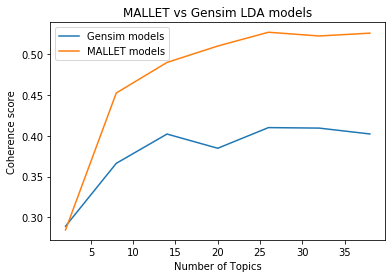

In [25]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values, label = "Gensim models")
plt.plot(x, mallet_coherence_values, label = "MALLET models")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(loc='best')
plt.title("MALLET vs Gensim LDA models")
plt.show()


In [264]:
len(mallet_model_list[5].show_topics(num_topics = -1))

32

In [271]:
lda_mallet = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(mallet_model_list[5], gamma_threshold=0.001, iterations=50)

2019-12-12 17:25:29,218 : INFO : using serial LDA version on this node


In [273]:
def bill_topic(bill):
    summary_lemmatized = bill["lemmatized_summary"]
    summary_bow = summaries_dictionary.doc2bow(summary_lemmatized)
    topics_probabilities = lda_mallet.get_document_topics(summary_bow, minimum_probability = 0)
    topic = max(topics_probabilities, key = lambda i : i[1])[0]
    return topic

In [274]:
with open('112_processed_mallet.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter='|')
    filewriter.writerow(['bill_id', 'dataset_topic', 'topic','summary'])
    for bill in bills:
        filewriter.writerow([bill['id'], bill['dataset_topic'], bill_topic(bill), bill['summary']])

In [288]:
lda_mallet.show_topic(24)

[('agency', 0.11896633226535004), ('federal', 0.0974578496769788), ('office', 0.05732969168548767), ('contract', 0.04811177057618571), ('requires', 0.03834234991333578), ('service', 0.029807237775093223), ('director', 0.027942644046431004), ('officer', 0.026918430589841898), ('government', 0.020904459267818684), ('building', 0.020142864646252426)]